<a href="https://colab.research.google.com/github/mariabandeira/EDO/blob/main/Pratica2_EDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade Prática 2

Aluna: Maria Eduarda Bandeira Hora

Matrícula: 20220007230

Disciplina: Equações Diferenciais Ordinárias

## Bibliotecas e Funções de Euler e Runge-kutta

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
def euler(a, b, m, y0):
  h = (b - a)/m
  x = a
  y = y0
  VetX = [x]
  VetY = [y]
  Fxy = f(x,y)
  #print("i \t x \t y \t Fxy")
  #print(f"{0:.3f} \t {x:.3f} \t {y:.3f} \t {Fxy:.3f}")
  for i in range(1, m+1):
    x = a + i*h
    y = y + h*Fxy
    Fxy = f(x,y)
    #print(f"{i:.3f} \t {x:.3f} \t {y:.3f} \t {Fxy:.3f}")
    VetX.append(x)
    VetY.append(y)
  return VetX, VetY

In [35]:
def euler2(a, b, m, y10, y20):
  h = (b - a)/m
  x = a
  y1 = y10
  y2 = y20

  VetX = [x]
  VetY1 = [y1]
  VetY2 = [y2]

  F1 = f1(x,y1, y2)
  F2 = f2(x,y1, y2)

  #print("i \t x \t y1 \t y2 \t f1 \t f2")
  #print(f"{0:.2f} \t {x:.2f} \t {y1:.2f} \t {y2:.2f} \t {F1:.2f} \t {F2:.2f}")

  for i in range(1, m+1):
    x = a + i*h
    y1 = y1 + h*F1
    y2 = y2 + h*F2
    F1 = f1(x,y1,y2)
    F2 = f2(x,y1,y2)
    #print(f"{i:.2f} \t {x:.2f} \t {y1:.2f} \t {y2:.2f} \t {F1:.2f} \t {F2:.2f}")
    VetX.append(x)
    VetY1.append(y1)
    VetY2.append(y2)
  return VetX, VetY1, VetY2

In [36]:
def runge_kutta(a, b, m, y0):
  h = (b - a)/m
  xt = a
  yt = y0

  VetX = [xt]
  VetY = [yt]
  k1_list, k2_list, k3_list, k4_list = [], [], [], []

  #print("i \t x \t y")
  #print(f"{0:.2f} \t {xt:.2f} \t {yt:.2f}")
  for i in range(1, m+1):
    x = xt
    y = yt
    k1 = f(x, y)
    x = xt + h/2
    y = yt + (h/2)*k1
    k2 = f(x, y)
    y = yt + (h/2)*k2
    k3 = f(x, y)
    x = xt + h
    y = yt + h*k3
    k4 = f(x, y)
    xt = a + i*h
    yt = yt + (h/6)*(k1 + 2*(k2 + k3) + k4)

    # Armazenar os valores de k
    k1_list.append(k1)
    k2_list.append(k2)
    k3_list.append(k3)
    k4_list.append(k4)

    #print(f"{i:.2f} \t {xt:.2f} \t {yt:.2f}")
    VetX.append(xt)
    VetY.append(yt)

  #print("\nTabelas dos valores de k:")
  #print("i \t k1 \t k2 \t k3 \t k4")
  for i in range(m):
    k1 = k1_list[i]
    k2 = k2_list[i]
    k3 = k3_list[i]
    k4 = k4_list[i]
    #print(f"{i:.2f} \t {k1:.2f} \t {k2:.2f} \t {k3:.2f} \t {k4:.2f}")

  return VetX, VetY

In [37]:
def runge_kutta2(a, b, m, y10, y20):
  h = (b - a)/m
  xt = a
  yt1 = y10
  yt2 = y20

  VetX = [xt]
  VetY1 = [yt1]
  VetY2 = [yt2]
  k1, k2, k3, k4 = [], [], [], []

  #print("i \t x \t y1 \t y2")
  #print(f"{0:.2f} \t {xt:.2f} \t {yt1:.2f} \t {yt2:.2f}")

  for i in range(1, m+1):
    x = xt
    y1 = yt1
    y2 = yt2
    k11 = f1(x, y1, y2)
    k12 = f2(x, y1, y2)
    x = xt + h/2
    y1 = yt1 + (h/2)*k11
    y2 = yt2 + (h/2)*k12
    k21 = f1(x, y1, y2)
    k22 = f2(x, y1, y2)
    y1 = yt1 + (h/2)*k21
    y2 = yt2 + (h/2)*k22
    k31 = f1(x, y1, y2)
    k32 = f2(x, y1, y2)
    x = xt + h
    y1 = yt1 + h*k31
    y2 = yt2 + h*k32
    k41 = f1(x, y1, y2)
    k42 = f2(x, y1, y2)
    xt = a + i*h
    yt1 = yt1 + (h/6)*(k11 + 2*(k21 + k31) + k41)
    yt2 = yt2 + (h/6)*(k12 + 2*(k22 + k32) + k42)
    #print(f"{i:.2f} \t {xt:.2f} \t {yt1:.2f} \t {yt2:.2f}")
    VetX.append(xt)
    VetY1.append(yt1)
    VetY2.append(yt2)

    # Armazenar os valores de k
    k1.append((k11, k12))
    k2.append((k21, k22))
    k3.append((k31, k32))
    k4.append((k41, k42))

  # Imprimir tabelas dos valores de k
  #print("\nTabelas dos valores de k:")
  #print("i \t k11 \t k12 \t k21 \t k22 \t k31 \t k32 \t k41 \t k42")
  for i in range(m):
      k11, k12 = k1[i]
      k21, k22 = k2[i]
      k31, k32 = k3[i]
      k41, k42 = k4[i]
      #print(f"{i:.2f} \t {k11:.2f} \t {k12:.2f} \t {k21:.2f} \t {k22:.2f} \t {k31:.2f} \t {k32:.2f} \t {k41:.2f} \t {k42:.2f}")

  return VetX, VetY1, VetY2

## 1) Método de Adam-Bashforth-Moulton para um PVI com uma EDO;

In [74]:
def adam_bashforth_moulton(a, b, m, y0, n_corr):
  h = (b - a)/m
  x = a
  y = y0

  RK_X, RK_Y = runge_kutta(x, b, m, y)

  yc = RK_Y[1]

  VetX = [x, x+h]
  VetYp = [y0, yc]
  VetYc = [y0, yc]
  func = [f(x, y0), f(x+h, yc)]

  for i in range(2, m+1):
    x = a + i*h

    y = yc + (h/2)* (3* func[i-1] - func[i-2])

    VetX.append(x)
    VetYp.append(y)

    for c in range(0,n_corr):
      if c == 0:
        func.append(f(x, y))
      else:
        func[i] = f(x, y)

      y = yc + (h/12)* (5* func[i] + 8* func[i-1] - func[i-2])

    yc = y
    VetYc.append(yc)

  print(f"i \t x \t yp \t yc")
  for i in range(len(VetX)):
    print(f"{i:.2f} \t {VetX[i]:.2f} \t {VetYp[i]:.2f} \t {VetYc[i]:.2f}")
  return VetX, VetYp, VetYc

In [67]:
def f(x, y):
  return x - 2*y + 1

In [75]:
VetX, VetYp, VetYc = adam_bashforth_moulton(0, 0.8, 4, 1, 3)

i 	 x 	 yp 	 yc
0.00 	 0.00 	 1.00 	 1.00
1.00 	 0.20 	 0.85 	 0.85
2.00 	 0.40 	 0.80 	 0.79
3.00 	 0.60 	 0.79 	 0.78
4.00 	 0.80 	 0.81 	 0.80


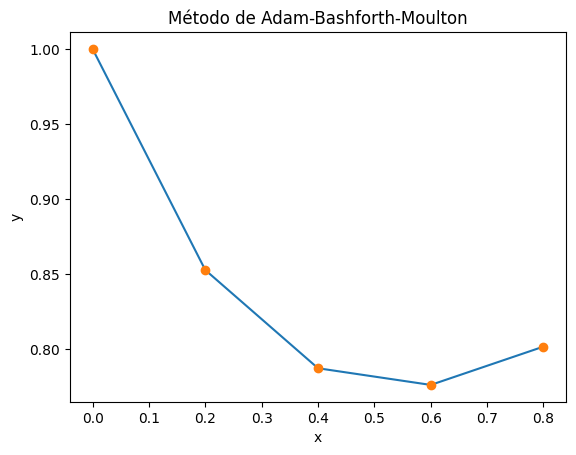

In [59]:
plt.plot(VetX[0:], VetYc[0:])
plt.plot(VetX[0:], VetYc[0:], 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Método de Adam-Bashforth-Moulton')
plt.show()

## 2) Método de Adam-Bashforth-Moulton para um PVI com um sistema de duas EDO’s;

In [78]:
def adam_bashforth_moulton2(a, b, m, y10, y20, n_corr):
  h = (b - a)/m
  x = a
  y1 = y10
  y2 = y20

  RK_X, RK_Y1, RK_Y2 = runge_kutta2(x, b, m, y1, y2)

  y1c = RK_Y1[1]
  y2c = RK_Y2[1]

  VetX = [x, x+h]
  VetY1p = [y10, y1c]
  VetY2p = [y20, y2c]
  VetY1c = [y10, y1c]
  VetY2c = [y20, y2c]
  f1 = [f(x, y10), f(x+h, y1c)]
  f2 = [f(x, y20), f(x+h, y2c)]

  for i in range(2, m+1):
    x = a + i*h

    y1 = y1c + (h/2)* (3* f1[i-1] - f1[i-2])
    y2 = y2c + (h/2)* (3* f2[i-1] - f2[i-2])

    VetX.append(x)
    VetY1p.append(y1)
    VetY2p.append(y2)

    for c in range(0,n_corr):
      if c == 0:
        f1.append(f(x, y1))
        f2.append(f(x, y2))
      else:
        f1[i] = f(x, y1)
        f2[i] = f(x, y2)

      y1 = y1c + (h/12)* (5* f1[i] + 8* f1[i-1] - f1[i-2])
      y2 = y2c + (h/12)* (5* f2[i] + 8* f2[i-1] - f2[i-2])

    y1c = y1
    y2c = y2
    VetY1c.append(y1c)
    VetY2c.append(y2c)

  print(f"i \t x \t y1p \t y1c \t y2p \t y2c")
  for i in range(len(VetX)):
    print(f"{i:.2f} \t {VetX[i]:.2f} \t {VetY1p[i]:.2f} \t {VetY1c[i]:.2f} \t {VetY2p[i]:.2f} \t {VetY2c[i]:.2f}")
  return VetX, VetY1p, VetY1c, VetY2p, VetY2c

In [62]:
def f1(x, y1, y2):
  return y1*y2 + 1

def f2(x, y1, y2):
  return y1 - y2

In [79]:
VetX, VetY1p, VetY1c, VetY2p, VetY2c = adam_bashforth_moulton2(0, 0.6, 3, 1, 1, 1)

i 	 x 	 y1p 	 y1c 	 y2p 	 y2c
0.00 	 0.00 	 1.00 	 1.00 	 1.00 	 1.00
1.00 	 0.20 	 1.45 	 1.45 	 1.04 	 1.04
2.00 	 0.40 	 1.04 	 1.18 	 0.88 	 0.91
3.00 	 0.60 	 1.15 	 1.06 	 0.89 	 0.86


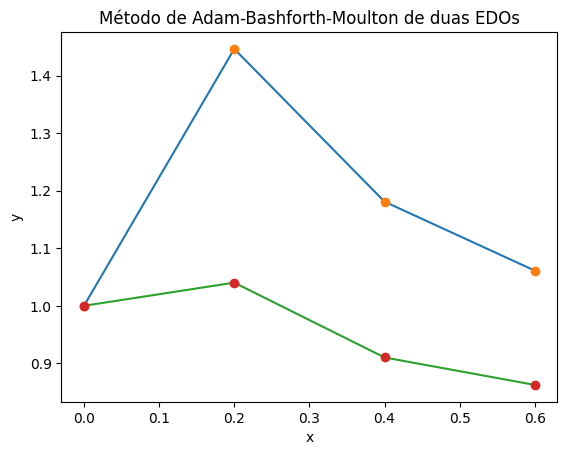

In [66]:
plt.plot(VetX[0:], VetY1c[0:])
plt.plot(VetX[0:], VetY1c[0:], 'o')
plt.plot(VetX[0:], VetY2c[0:])
plt.plot(VetX[0:], VetY2c[0:], 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Método de Adam-Bashforth-Moulton de duas EDOs')
plt.show()